# Entrofy Tutorial

A step-by-step guide through Entrofying your workshop.

## Introduction

This software is meant to help you select subsets from a larger set of 
possible options. It was initially designed to help us with the selection of 
participants from a workshop, but it could be easily extended for other uses 
(conference speakers, hackathon participants, ...). 

The software's original use was rooted in the simple problem of 
having too many applicants for the space-limited workshop we were organizing. 
We approached it in the following way: 

1. First we decided on a set of applicants we would be happy to accept at the workshop. Unfortunately, that set still exceeded the number of available slots.
2. We decided on a set of criteria that were important to us, and compared them to our input data set. For example, we wanted participants from all subfields of astronomy (the workshop we organized was astronomy-themed), not just participants working on, say, galaxies or cosmology. At the same time, we also wanted a certain ratio of graduate students to postdocs to faculty members, along with a few other criteria. It turns out trying to optimize over more than two or so criteria by hand is *extremely* difficult. So we decided to outsource the job to a computer, which is much better than us at keeping the attributes of 200 applicants in their memory all at the same time, and out came this software. 
3. For each attribute, we carefully chose how many participants we wanted in each category, and used these as guidelines for the inputs into the software
4. We used the software to pick a subset of participants out of our larger set, whom we invited to our workshop.

### Why this approach is useful

Why would you go through this procedure to select your participants?
Well, in part because choosing a set of participants for your event can be a very daunting task, if you're required to select according to more than one or two criteria. If you're like me, you probably worry about juggling all those different competing requirements in your head. Are we inviting enough students? What about women? Do we have anyone working on exoplanets in our participant list? The code we developed is designed to make your life easier and the selection procedure faster.

Aside from that, we learned while going through this that using an algorithmic approach forced us to think very carefully about which criteria you apply to a selection, much more than we would have if we'd just selected participants out of a list. We had to explicitly choose not only which categories to include, but how much weight to give to any subgroup in each category. At the same time, we became *accountable* for these choices. For example, we chose gender as one of our categories, but not ethnicity. This, rightfully, was pointed out to us during and after the workshop. If we'd just done the selection by hand, and hadn't talked about it at the workshop, nobody would ever have known. *Transparency* and *accountability* are the two main factors why we would advocate for choosing this approach over more traditional ways. 


### What the software is meant to (not) do

It is valuable to point out what our software is designed to do, and what it is explicitly **not** designed to do.
It's main purpose is to break ties. That is, given that you have a set of applicants, all of which you would be (equally) happy to have at your event, and that set is larger than your number of available spots, you can use our software to choose the subset you'd like to admit based on some criteria of relevance. 

However, it is explicitly *not* designed to accept or reject participants based on criteria encoding some form of merit judgment. That is, the decision whether an applicant should attend your workshop in principle is still yours, and should be done before using our software. We can't stop you from putting merit-based criteria into your selection procedure, but we would strongly caution against it.

### A Note on Diversity

One fairly obvious goal during our selection was gender diversity. This rightfully raises questions and concerns about including demographics-based criteria in the selection as a form of quota. Quotas can be problematic because they open up minorities to (unmerited) criticism of being accepted by sole virtue of their gender or race (or other demographic criteria), which diminishes their achievements and can potentially harm them more than it helps.
We would like to point out that this is not the case here, because the software assumes that any selection on merit has been already performed. As mentioned above, the software is not designed to handle that, and thus cannot help with any biases toward minorities at that stage. However, given that you have selected a set of applicants you would be equally happy to attend your workshop, there is no good reason not to include diversity categories in your selection procedure. 

The second difference between our approach and a quota is that nobody will get accepted based on diversity criteria alone (unless those are the only categories included in your selection procedure). In our workshop, nobody was accepted because they were female, but someone might be accepted because they were a female graduate student working on exoplanets who was also an expert programmer. The algorithm will try to balance all categories according to the target fractions you've put in (see below for more technical details on how to do that), but unless you manually weight them, it will assume all categories to be of equal importance for your selection. 


## Some notes on data collection and preparation

Here are some guidelines for collecting and preparing the input data for use in entrofy. 

First and most important rule:

0. Think about your criteria of interest **before** writing your application form!
    
This might seem obvious in hindsight, but we first collected applications, and *then* decided to 
write a software to do the selection. If you can, avoid this, because following the guidelines below 
for designing your application will help you keep your sanity later.

1. When designing your application form, **avoid free-form text answers for categories you'd like to select on**. At the moment, `entrofy` supports two types of categories: categorical (e.g. academic seniority: "student", "postdoc", "faculty"; "statistics expertise": "1", "2", "3") and continuous (e.g. age: "24", 56", "38.925"). Free-form text answers will need to be coded (by hand) into one of these two categories. Drop-down menus and multiple-choice questions work very well for this!
2. **Use emtpy fields for non-responses**. Some of your questions might be optional. Some might have to be optional. Use empty fields in your table to denote non-responses, because otherwise a non-response might be counted as a separate category (unless you might actually want that behaviour). 
4. The software expects each **row** to correspond to a *participant* and each **column** to correspond to an *attribute*. 
4. **Each column is assumed to correspond to one *category***. Each *category* could have several *attributes*. For example, the column "academic seniority" (=category) could have entries "graduate student", "postdoc", "faculty" and "other" (=attributes). Columns of continuous attributes (e.g. age) can have continuous values.
5. Columns should have names or headers. These will be used in the code for identifying and labeling columns. 
6. If you can, export your table to a **csv file**. While `pandas` has an interface to, for example, Excel, a simple csv-file is probably going to be safer.


## Contact us!

We'd love to hear from you. Questions, concerns, improvement suggestions ... let us know what you think!

- [Project home](https://github.com/dhuppenkothen/entrofy)
- [Documentation](http://entrofy.readthedocs.io/en/latest/)
- [Issues](https://github.com/dhuppenkothen/entrofy/issues)

## Entrofying your panel

Now that you've got your data and have pre-selected, you're ready to go.

The first step is to load your data into a `pandas.DataFrame`. `pandas` can read from a 
wide range of data format, but we'd recommend a `.csv` file.

Let's load some packages first:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import entrofy.mappers
import entrofy.core

seed = 20160415

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 28 days


First, we'll need to load in the data. We're going to use a sample data set that was automatically generated. 

**Note**: the names in this data set were generated by the python package [names](https://github.com/treyhunner/names), all other attributes were randomly distributed among the indices to create the data set below. Any similarity to real persons is purely coincidental. 

In [2]:
df=pd.read_csv('test.csv')
df.head()

,name,gender,career_stage,country,subfield
0,Theresa Hiller,NaN,junior-faculty,OECD,cosmology
1,Shirley Stroud,female,senior-faculty,OECD,cosmology
2,William Bedgood,male,junior-faculty,OECD,NaN
3,Mark Wills,male,junior-faculty,OECD,cosmology
4,Sylvia Kelley,female,senior-faculty,non-OECD,solar


Note that non-responses are indicated by "not-a-number" (`NaN`).

Also notice that this has no column with continuous values. We're going to add an "age" column to change that:

In [3]:
age = np.random.poisson(30.0, size=len(df.index))
df["age"] = age
df.head()

,name,gender,career_stage,country,subfield,age
0,Theresa Hiller,NaN,junior-faculty,OECD,cosmology,31
1,Shirley Stroud,female,senior-faculty,OECD,cosmology,29
2,William Bedgood,male,junior-faculty,OECD,NaN,27
3,Mark Wills,male,junior-faculty,OECD,cosmology,25
4,Sylvia Kelley,female,senior-faculty,non-OECD,solar,32


### Data Types

It is useful to speak of the different data types you're likely to encounter in your data.

Broadly speaking, there are two types of data: *categorical* data contains anything you can 
put into discrete categories, such as in the example above the categories `country`, `subfield`, 
`career_stage` or `gender`. On the other hand, *continuous* data contains any continuous variable.
These two types of data require somewhat different treatment. For categorical data, all you'd want to 
do is infer the number of different attributes represented in a column (such as for `country` above, 
there are two attributes a person can have: 'OECD' or 'non-OECD') and then assign target fractions.
Mapping continuous data is more difficult, because likely you'd want to assign *ranges* and assign each 
person a bin based on those ranges. This, in practice, transforms the continuous data into categorical 
data, which is what the algorithm is equipped to handle.

### A first look at the data

If you want to get a first look at your data, you can either explore your data table directly, or you can use the nifty tool [`pandas-profiling`](https://github.com/JosPolfliet/pandas-profiling).


### Visualizing the Data Set

One thing you might want to do before running entrofy is visualizing the data set.
For example, you might be interested how balanced or imbalanced your input data set is.
If your applicants just so happen to consist to 90% of junior faculty, trying to get an 
even split between junior faculty, senior faculty and graduate students might be 
quite difficult. 

There's some code in `entrofy.plotting` that helps with the visualizations. 

#### Visualizing a single category

If you want to visualize a single category, `plot_distribution` is what you likely 
want to use.

Depending on your data type, `plot_distribution` will either return a bar plot (categorical 
data) or a histogram (continuous data):

/home/bmcfee/miniconda/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


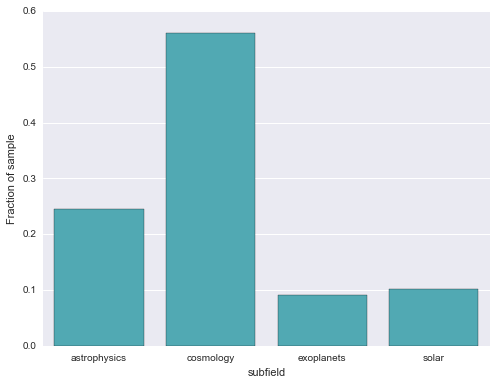

In [4]:
ax = entrofy.plotting.plot_distribution(df, "subfield",
                                        xtype="categorical",
                                        cmap="YlGnBu", ax=None)

As you can see, the function allows you to set your own colormap. If you are plotting continuous data, 
it also allows you to control the number of bins in the histogram.

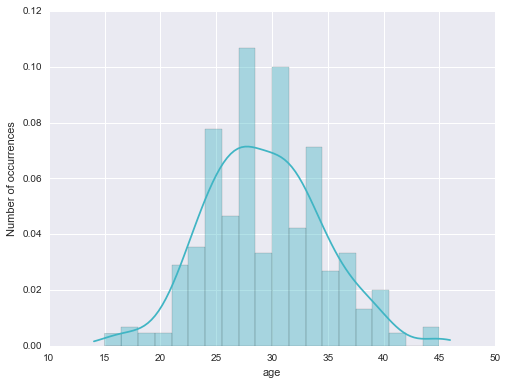

In [5]:
ax = entrofy.plotting.plot_distribution(df, "age",
                                        xtype="continuous",
                                        cmap="YlGnBu", bins=20)

**Advanced tip**: If you already have a Figure and axes objects defined, for example when making a Figure with multiple sub-plots, you can used the `ax` keyword to plot into these subplots:

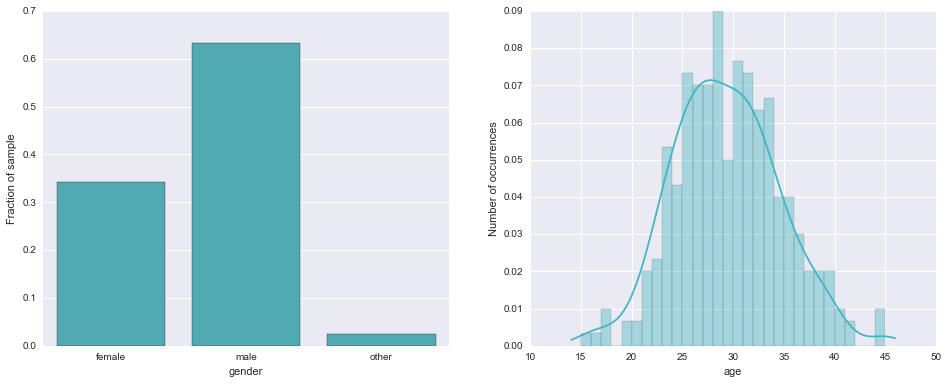

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))
ax1 = entrofy.plotting.plot_distribution(df, "gender",
                                         xtype="categorical", ax=ax1)
ax2 = entrofy.plotting.plot_distribution(df, "age",
                                         xtype="continuous", ax=ax2)

#### Visualizing multiple categories

For visualizing multiple categories, you can use `plot_correlation`. This will plot 
two data sets together. The type of plot is chosen depending on the type of data 
being plotted. 

For plotting two categorical variables against each other, the function will produce a 
so-called *bubble plot*. The size of the bubble corresponds to the relative fraction of 
the data set in those two categories. This can quickly tell you something about which 
combinations of variables occur often in your data set.

The keyword argument `s` controls the size of the bubbles relative to the plot, `prefac` 
scales the color map in `cmap`:

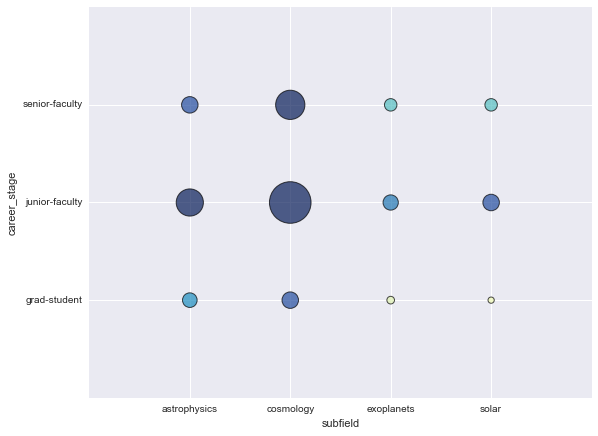

In [7]:
ax = entrofy.plotting.plot_correlation(df, "subfield", "career_stage",
                                       xtype="categorical", 
                                       ytype="categorical", s=5, prefac=5,
                                       cmap="YlGnBu")

For plotting a categorical variable against a continuous variable, there are various options available. For more details on the various options, see the excellent `seaborn` tutorial: https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html

The options can be called using the keyword argument `cat_type`.

**Note**: the option `swarm` will only work with `seaborn >= 0.7`.

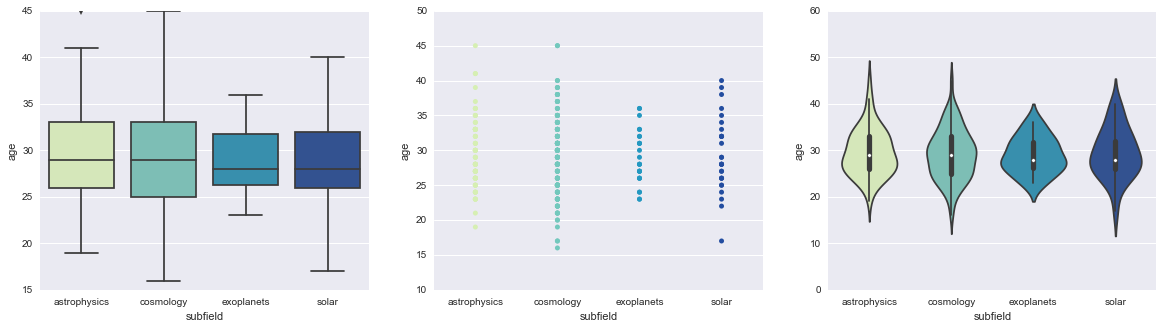

In [8]:
plottypes = ["box", "strip", "violin"]#, "swarm"]

fig, axes = plt.subplots(1, len(plottypes), figsize=(20,5))
for ax, t in zip(axes, plottypes):
    ax = entrofy.plotting.plot_correlation(df, "subfield", "age",
                                           xtype="categorical", 
                                           ytype="continuous",
                                           cat_type=t, ax=ax)

Finally, for continuous data, two options exist: a kernel density estimate ("kde") or a simple scatter plot ("scatter"):

LinAlgError: singular matrix

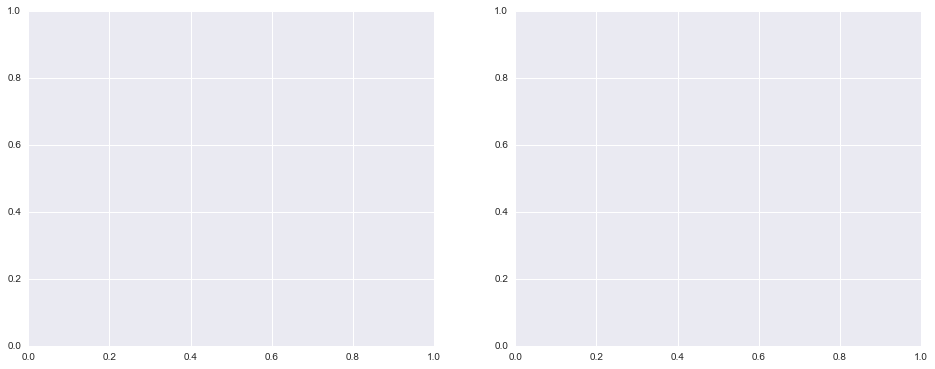

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

ax1 = entrofy.plotting.plot_correlation(df, "age", "age", ax=ax1,
                                        xtype="continuous",
                                        ytype="continuous", cont_type="kde")
ax2 = entrofy.plotting.plot_correlation(df, "age", "age", ax=ax2,
                                        xtype="continuous",
                                        ytype="continuous", cont_type="scatter")


#### Plotting Everything Together

Sometimes, it might be useful to plot the entire data set in one Figure be able to compare different attributes at a glance. You can use the function `plot_triangle` to do this.
It uses the functions above and tiles them in a triangular Figure. The same keyword arguments mentioned above can also be passed into `plot_triangle`. You'll need to define a `weights` dictionary (see below for details) in order for the function to know which columns to use (here, all columns but the `name` column):

In [10]:
weights = {"gender": 1.0, "career_stage": 1.0, 
           "country": 1.0, "subfield": 1.0}

Now let's call `plot_triangle` and produce a plot:

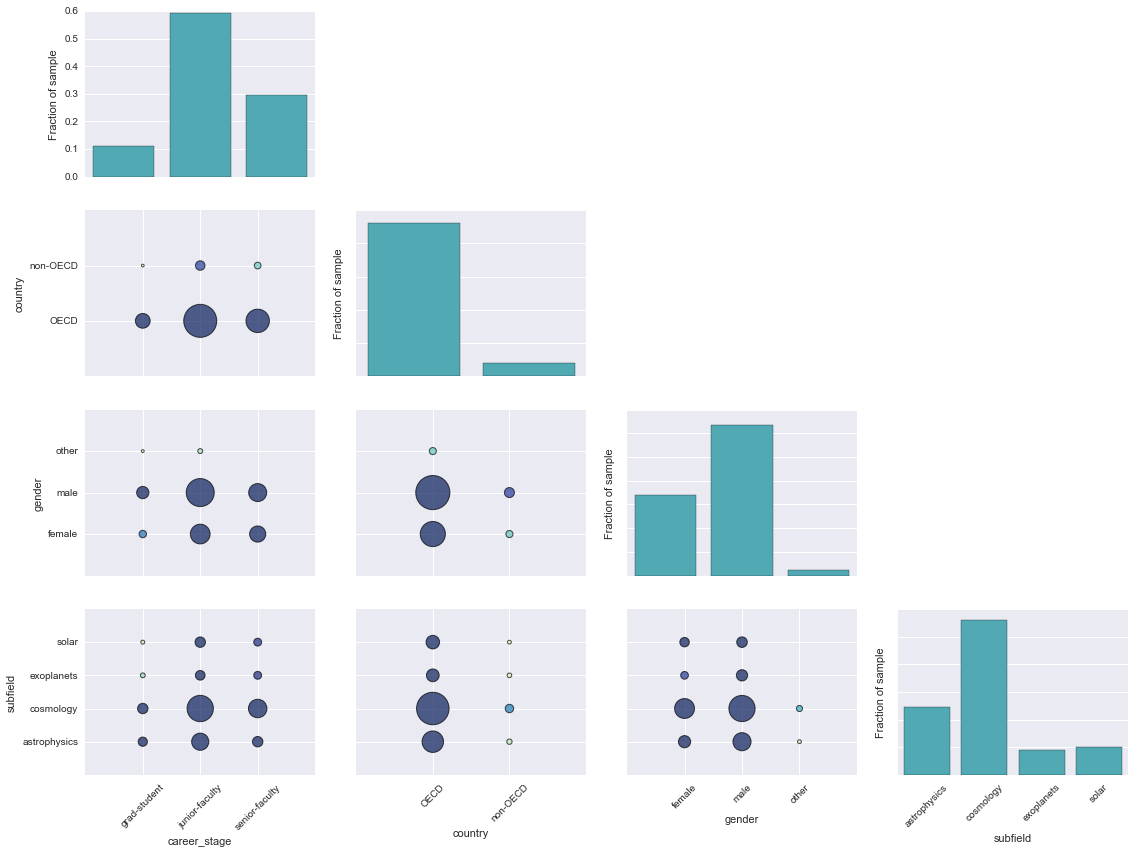

In [11]:
fig, axes = entrofy.plotting.plot_triangle(df, weights)

### Defining Weights

`entrofy` gives you the option to apply different weights for different columns, 
depending on how important you think these categories should be in finding a solution.
You might also have categories you do not want to include in the solution. In our 
example above, the column containing the names is an obvious candidate for exclusion. 
It would make little sense to try and diversify by applicants name, because participants 
likely all have different names anyway.

So we're going to exclude the `name` column and give the other columns all equal weight.
Columns not defined in `weights` will simply be ignored, while columns with weight $1$ will be fully considered in the solution. 

In [12]:
weights = {"gender": 1.0, "career_stage": 1.0, 
           "country": 1.0, "subfield": 1.0, "age": 1.0}

### Defining target fractions

Perhaps the most important step after defining categories to diversify over is to 
actually set the target fractions. That is, you need to decide how large a fraction 
of participants in the solution will have a certain attribute from a certain category.
For example, if you are selecting speakers for a conference, you could equally weight 
the `career-stage` column, such that you have $1/3$ graduate students, $1/3$ junior faculty 
and $1/3$ senior faculty in your final set. But maybe for a summer school you're organizing, 
this makes little sense, so you instead weight $8/10$, $1/10$ and $1/10$ in favour of 
graduate students, who are likely to get more out of the summer school than senior academics 
would. Defining target fractions is delicate, so give this some thought!
By default, all values will have the same target fraction. 
In order to change this, we're going to make some **mappers**. These mappers know the 
target fractions, and they also have some functionality for transforming the data columns 
that is going to come in handy later.

There are two ways to do this:

#### The quick and easy way to make a dictionary of mappers

Here's the quick and easy way to do this:

In [13]:
mappers = entrofy.core.construct_mappers(df, weights)

In [14]:
mappers

{'age': <entrofy.mappers.ObjectMapper at 0x7f848d6116d0>,
 'career_stage': <entrofy.mappers.ObjectMapper at 0x7f848cb68510>,
 'country': <entrofy.mappers.ObjectMapper at 0x7f848c27ef50>,
 'gender': <entrofy.mappers.ObjectMapper at 0x7f848d649e90>,
 'subfield': <entrofy.mappers.ObjectMapper at 0x7f848d5b6210>}

In `entrofy`, the different types of data are encapsulated by separating functionality into two classes:
`ObjectMapper` for categorical data and `ContinuousMapper` for continuous data. This should cover most 
of the cases you come across. 

**Advanced tip**: If you happen to have data that does not fit into this mold, you can subclass 
`BaseMapper` to make your own special case.

In the above example, while age is technically discrete (by only allowing integer numbers), in practice, 
for most cases you would likely want to treat this as a continuous variable and bin it in some form to 
consider age ranges rather than raw ages: considering age as a categorical variable would leave you 
with *many* categories to optimize over, which is not ideal for most practical applications.

In the example above, however, the code rather stupidly inferred the type of the 'age' column as categorical.
In order to change that, you can pass a dictionary of `"column":type` pairs that will match up the 
data with the right mapper:

In [15]:
datatypes = {"age": "continuous",
             "gender": "categorical",
             "subfield": "categorical",
             "country": "categorical",
             "career_stage": "categorical"}

mappers = entrofy.core.construct_mappers(df, weights, datatypes)

In [16]:
mappers

{'age': <entrofy.mappers.ContinuousMapper at 0x7f848bd4b410>,
 'career_stage': <entrofy.mappers.ObjectMapper at 0x7f848bd21450>,
 'country': <entrofy.mappers.ObjectMapper at 0x7f848c7c3b90>,
 'gender': <entrofy.mappers.ObjectMapper at 0x7f848bc9eb50>,
 'subfield': <entrofy.mappers.ObjectMapper at 0x7f848d5b6d90>}

Now the mappers have the correct type. The `age` mapper is a `ContinuousMapper`, 
which defines a way to sort the continuous values into several categorical bins.
The default construction above has simply assumed some sensible defaults for the 
number of bins (3) and the bin edges (equally spaced bins between the minimum 
and maximum values in the "age" column):


In [17]:
mappers["age"].boundaries

array([ 15.,  25.,  35.,  45.])

You can access the target fractions of the mappers by calling their `targets` attribute:

In [18]:
mappers["subfield"].targets

{'astrophysics': 0.25, 'cosmology': 0.25, 'exoplanets': 0.25, 'solar': 0.25}

Here's a simply way to change them:

In [19]:
# new targets in alphabetical order
new_targets = [0.2, 0.5, 0.2, 0.1]

# sort keys for the targets dictionary alphabetically:
sorted_keys = np.sort(mappers["subfield"].targets.keys())

for t, key in zip(new_targets, sorted_keys):
    mappers["subfield"].targets[key] = t

In [20]:
mappers["subfield"].targets

{'astrophysics': 0.2, 'cosmology': 0.5, 'exoplanets': 0.2, 'solar': 0.1}

And we've reset the targets. You may do this for any mapper in the dictionary you like.
This especially comes in handy if you iterate on your subset selection several times and 
would like to change the target fractions between runs.

**Important**: The sum of all target fractions in a single category can *not* be larger than one. In the example above, the sum of the four target fractions in the `subfield` category must sum up to 1. In some cases, you might have fields that many participants have not filled out (because it was an optional question), in which case that column will have a large fraction of `NaN` values. If this is the case, it might be advantageous to set target fractions such that the sum of all fractions in a category sums up to **less** than one. 
For example, in a category where 50% of responses are missing, you might want to set target fractions that add up to only 0.5. The reason for this is that responses with `NaN` will not be counted in the final estimate. Essentially, you will be selecting at random from this subset in that category. From this follows that anyone who has in fact responded to this question will receive higher priority during selection, but this might not be what you want. Setting your target fractions to smaller values (but accounting for the *relative* difference between target fractions of the same category) will account for this issue.

### The slightly more complex way to define mappers

We can also define mappers column by column and then construct the final dictionary 
ourselves. This is somewhat more work, but it helps you understand your data and your 
targets. It is also useful if you have several continuous variables and want to set the 
boundaries for the bins yourself.

Here's an example for the column `gender`:

In [21]:
gender_targets = {"female": 0.4, "male": 0.4, "other": 0.2}
gender_mapper = entrofy.mappers.ObjectMapper(df["gender"], n_out=3, targets=gender_targets)

You can access the targets using its attribute:

In [22]:
gender_mapper.targets

{'female': 0.4, 'male': 0.4, 'other': 0.2}

Here's another example of how to define a categorical mapper:

In [23]:
career_mapper = entrofy.mappers.ObjectMapper(df["career_stage"])

Now the targets will all be set to the same value:

In [24]:
career_mapper.targets

{'grad-student': 0.3333333333333333,
 'junior-faculty': 0.3333333333333333,
 'senior-faculty': 0.3333333333333333}

Now we can change them afterwards:

In [25]:
career_mapper.targets["grad-student"] = 0.5
career_mapper.targets["junior-faculty"] = 0.3
career_mapper.targets["senior-faculty"] = 0.2

So now the targets should have the right values:

In [26]:
career_mapper.targets

{'grad-student': 0.5, 'junior-faculty': 0.3, 'senior-faculty': 0.2}

Awesome, let's do this for the other categories:

In [27]:
country_targets = {"OECD": 0.7, "non-OECD": 0.3}
country_mapper = entrofy.mappers.ObjectMapper(df["country"], n_out=2, targets=country_targets)

In [28]:
subfield_mapper = entrofy.mappers.ObjectMapper(df["subfield"])

In [29]:
subfield_mapper.targets

{'astrophysics': 0.25, 'cosmology': 0.25, 'exoplanets': 0.25, 'solar': 0.25}

In [30]:
subfield_mapper.targets["cosmology"] = 0.5
subfield_mapper.targets["astrophysics"] = 0.2
subfield_mapper.targets["exoplanets"] = 0.2
subfield_mapper.targets["solar"] = 0.1

The column "age" has continuous values. So we're going to need another kind of mapper. We also need to decide what boundaries we want to subdivide our data into. Or you can just let the software figure it out:

In [31]:
age_mapper = entrofy.mappers.ContinuousMapper(df["age"], n_out=3)

The keyword `n_out` sets the number of categories the age column will be split into.
By default, the column will be split into `n_out` even bins between the minimum and the 
maximum value:

In [32]:
age_mapper.boundaries

array([ 15.,  25.,  35.,  45.])

The targets will also be automatically named and set:

In [33]:
age_mapper.targets

{'15.000000_25.000000': 0.3333333333333333,
 '25.000000_35.000000': 0.3333333333333333,
 '35.000000_45.000000': 0.3333333333333333}

You can easily change the boundaries by either replacing the `boundaries` keyword with your own array, 
or by creating the `ContinuousMapper` object with your own list of boundaries. Please note that the 
number of elements in the list describing the boundaries must be `n_out + 1` (i.e. it needs to have a 
lower and an upper boundary for each bin).

At the same time, you can also set the targets (in the same order as the boundaries defined), if you know 
what they ought to be named:

In [34]:
age_boundaries = [0.0, 20.0, 30.0, 40.0, 50.0]
age_targets = {"0-20":0.3, "20-30":0.3, "30-40":0.2, "40-50":0.2}
age_column_names = ["0-20", "20-30", "30-40", "40-50"]
age_mapper = entrofy.mappers.ContinuousMapper(df["age"], n_out=4,
                                             boundaries=age_boundaries,
                                             targets=age_targets, column_names = age_column_names)

In [35]:
print(age_mapper.boundaries)
print(age_mapper.targets)

[0.0, 20.0, 30.0, 40.0, 50.0]
{'30-40': 0.2, '40-50': 0.2, '0-20': 0.3, '20-30': 0.3}


Now that we have all mappers, we can put them into a dictionary. Make sure the keywords in the dictionary 
match the names of the columns in your file:

In [36]:
mappers = {"age": age_mapper, "gender": gender_mapper, 
          "country": country_mapper, "subfield": subfield_mapper, 
          "career_stage": career_mapper}

### Running Entrofy

Now we've got all the necessary ingredients to entrofy our panel.
Optional additional inputs are:

* `pre_selects`: A list of of table indices of entries who must be in the final solution. Note that they still count toward the target fractions!
* `opt_outs`: A list of table indices of entries that will never be considered in the solution. Useful when re-running the code after a subset of applicants has declined.
* `quantile`: We introduce a bit of "fuzziness" at the top to help breaking ties between candidates that provide similar marginal gain in the optimization. The value of `quantile` sets the top quantile among all applicants that will effectively be considered the same in terms of their score.  Typical values would be in the range `[0.9, 1.0)`.
* `n_trials`: Because of the randomness introduced during tie-breaking, we run the algorithm several times and select the highest scoring solution out of `n_trials` runs
* `seed`: The seed for initializing the random number generator. Set this to some fixed value to make sure you always get the same (reproducible) results.

In the following, we're going to select 20 participants out of our sample of 300 with the mappers and weights defined above, with no pre-selected applicants or opt-outs:

In [37]:
idx, max_score = entrofy.core.entrofy(df, 20,
                                      mappers=mappers,
                                      weights=weights,
                                      seed=seed)
print(max_score)

37.4025790618


Here's the selected subset:

In [38]:
df.loc[idx]

,name,gender,career_stage,country,subfield,age
18,Brenda Davenport,female,junior-faculty,non-OECD,astrophysics,32
55,Richard Negron,male,senior-faculty,OECD,cosmology,17
66,Sherri Morrison,female,senior-faculty,OECD,solar,40
67,Janis Nickerson,female,grad-student,OECD,cosmology,25
74,Bruno Wallace,male,grad-student,OECD,astrophysics,19
79,Kim Olague,female,junior-faculty,OECD,exoplanets,28
88,Edwin Modrak,male,senior-faculty,non-OECD,cosmology,33
108,Denise Obermeyer,female,junior-faculty,non-OECD,solar,35
121,Robert Love,male,junior-faculty,OECD,cosmology,17
144,Jefferson Folger,male,senior-faculty,OECD,cosmology,40


How do we know whether we've done a good job? 

### Plotting the results

One way to evaluate the results is to plot the same Figure as above, but for both the input data set and the output data set:

In [39]:
mappers

{'age': <entrofy.mappers.ContinuousMapper at 0x7f848c305550>,
 'career_stage': <entrofy.mappers.ObjectMapper at 0x7f848c341310>,
 'country': <entrofy.mappers.ObjectMapper at 0x7f848c7a92d0>,
 'gender': <entrofy.mappers.ObjectMapper at 0x7f848c35ac90>,
 'subfield': <entrofy.mappers.ObjectMapper at 0x7f848bc9ea10>}

In [40]:
mappers["age"].targets

{'0-20': 0.3, '20-30': 0.3, '30-40': 0.2, '40-50': 0.2}

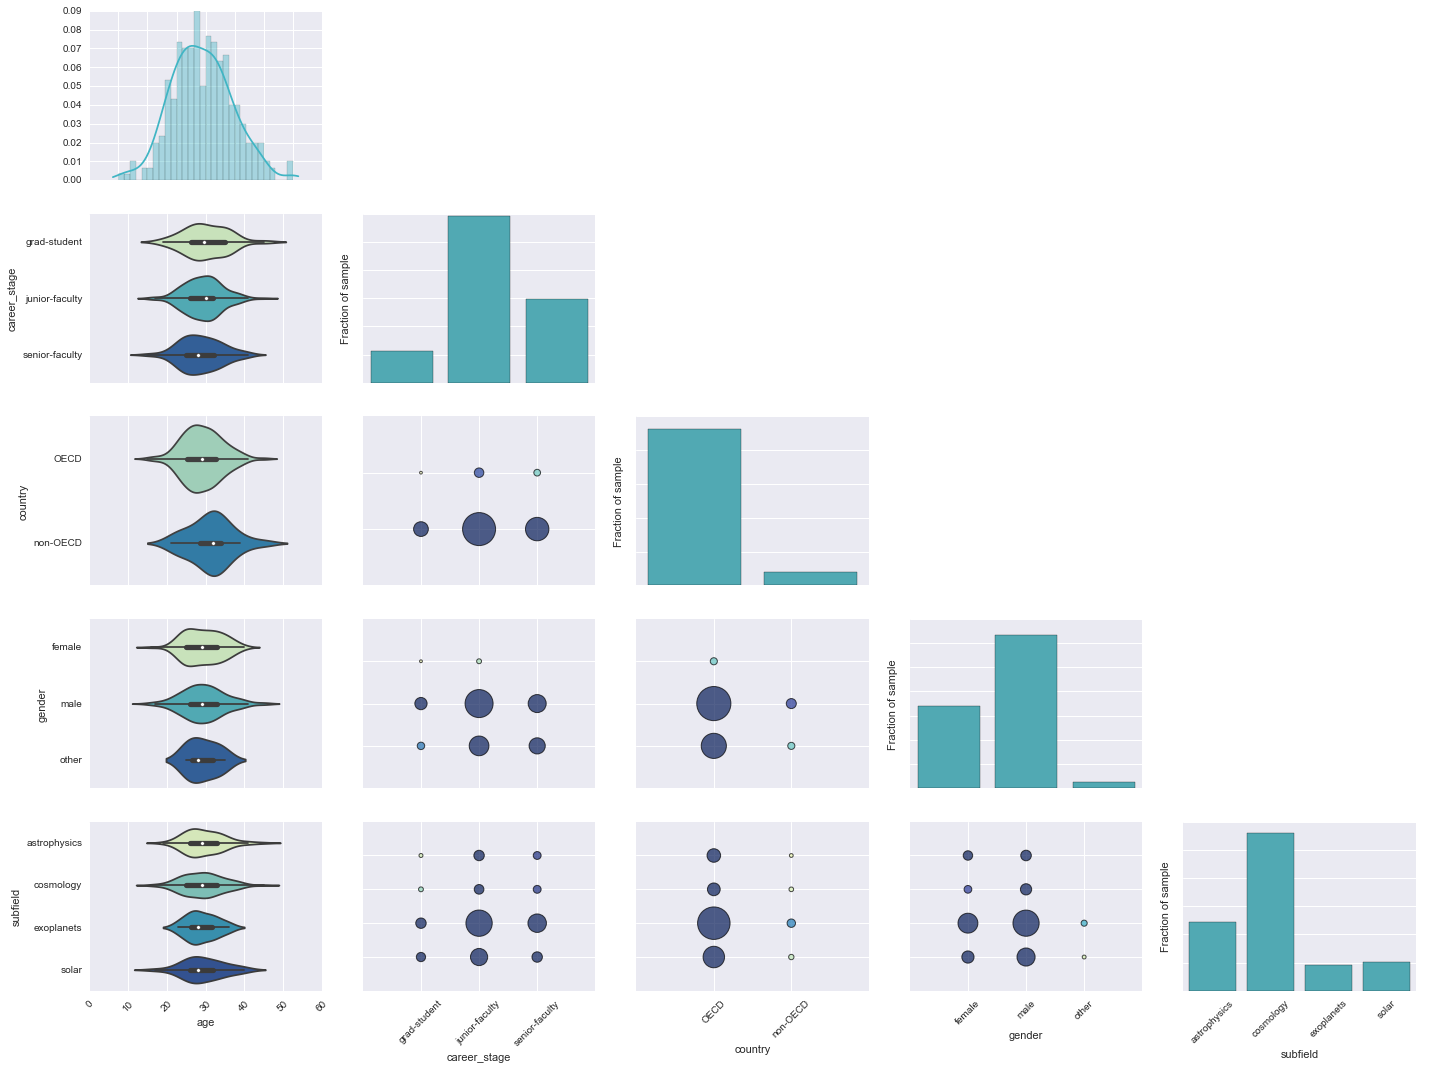

In [41]:
# plot the input data distribution
fig, ax  = entrofy.plotting.plot_triangle(df, weights,
                                          mappers=mappers,
                                          cat_type="violin")

Let's make another data frame with just the selected participants:

In [42]:
df_out = df.loc[idx]

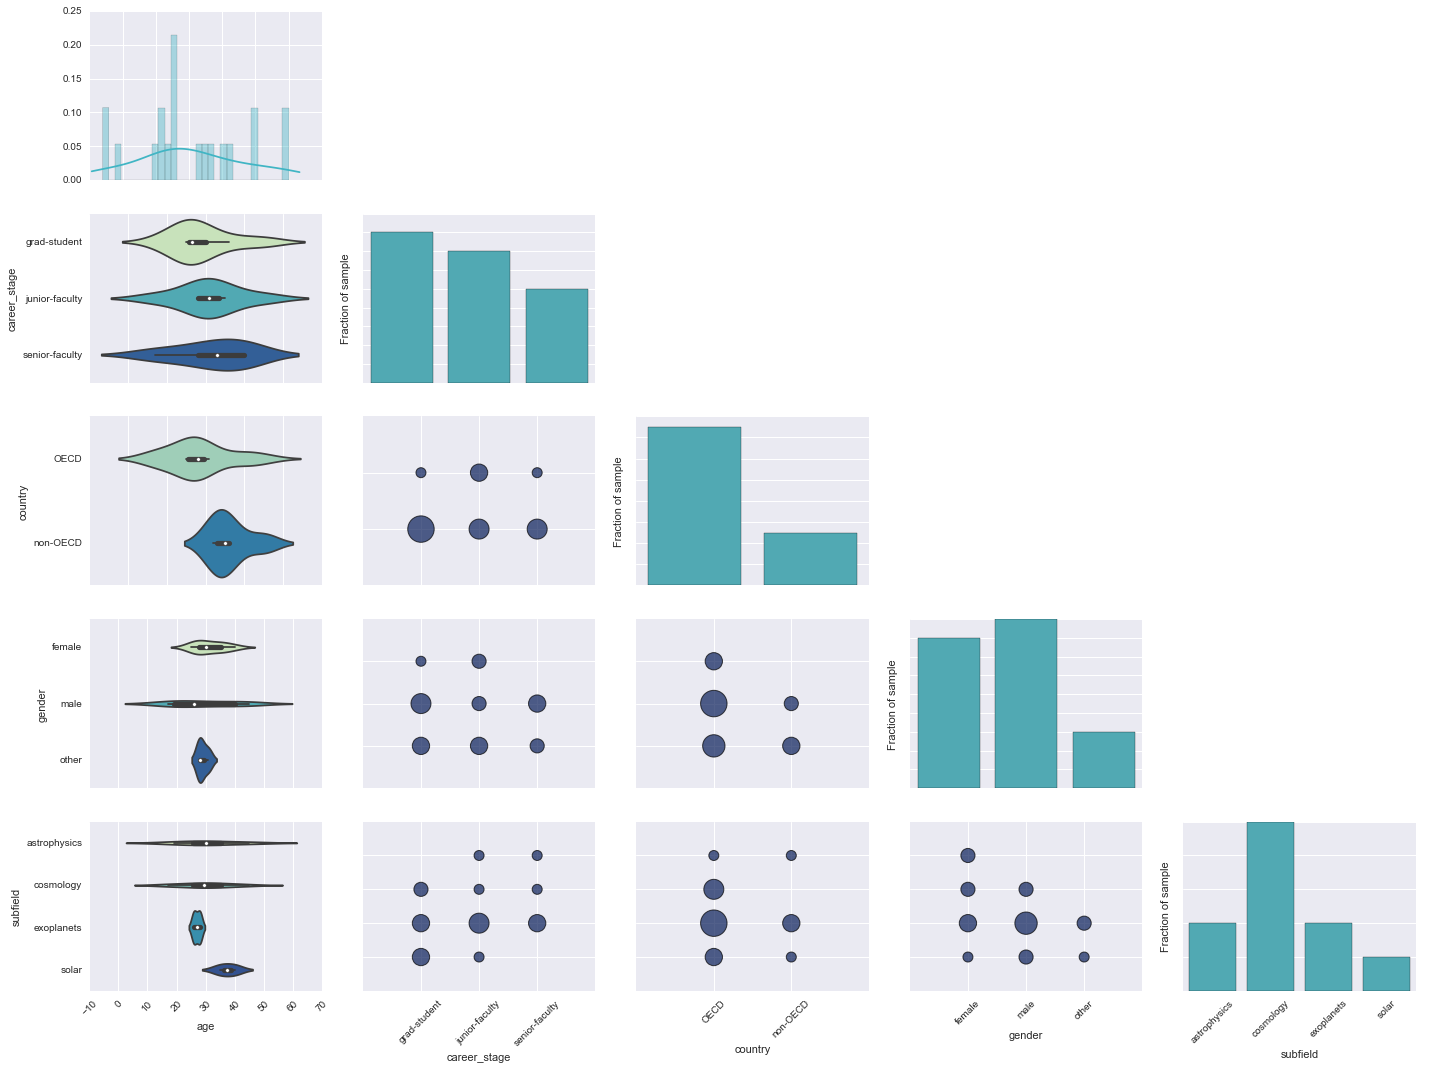

In [43]:
# plot distribution of selected:
fig, ax  = entrofy.plotting.plot_triangle(df_out, weights,
                                          mappers=mappers,
                                          cat_type="violin")

Another way to visualize this is to make plots comparing the input fractions of each attribute to the target fractions supplied by the user and the fractions of each attribute in the final sample. There's a function for that, too!

For plotting a single column, use `plot_fractions`:

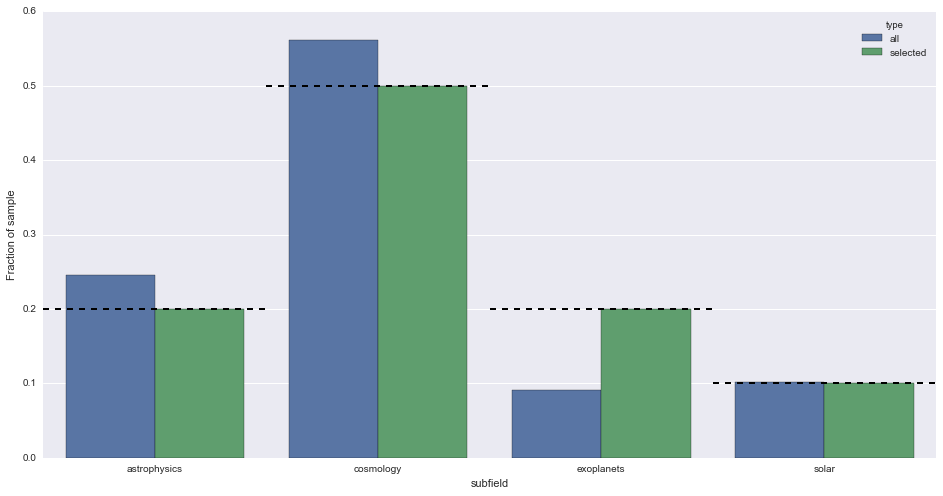

In [44]:
_, _ = entrofy.plotting.plot_fractions(df["subfield"], idx,
                                       "subfield", mappers["subfield"])

If you want to get an overview of *all* categories, use `plot`:

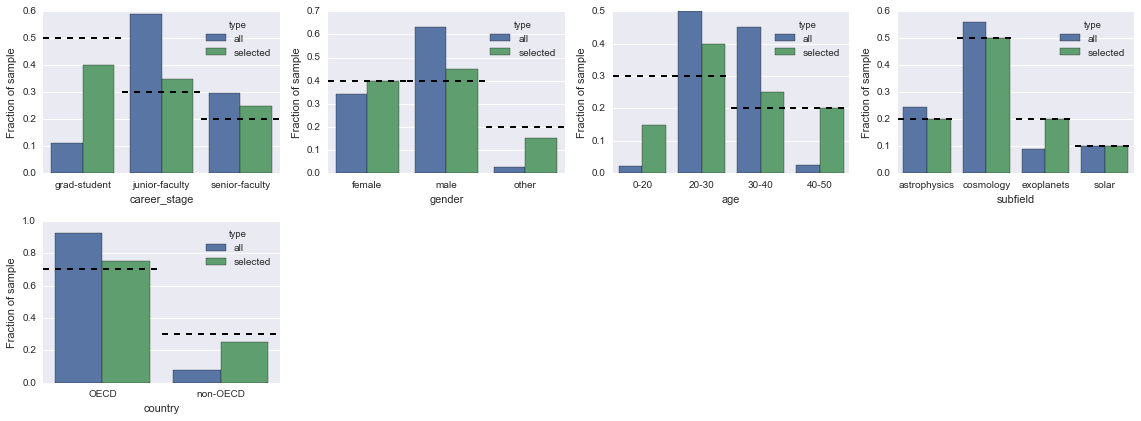

In [45]:
_ = entrofy.plotting.plot(df, idx, weights, mappers=mappers, cols=4)

Looks pretty good! 

### Pre-selects and Opt-Outs

In practice, you might want to run entrofy more than once. For example, you might choose a group of participants, invite them to your workshop, and wait for their responses. Naturally, a few will decline to attend, in which case you might want to re-run entrofy with these participants removed, and all the other participants pre-selected.

This is fairly straightforward to do. Let's have a look at the index again:

In [46]:
idx

Int64Index([ 18,  55,  66,  67,  74,  79,  88, 108, 121, 144, 204, 208, 234,
            239, 242, 248, 256, 272, 296, 298],
           dtype='int64')

Let's exclude the third, tenth and sixteenth participant from the list of preselected. Assuming everyone else has accepted, the rest of the indices become part of `pre_selected`:

In [47]:
opt_outs = [idx[3], idx[10], idx[16]]
pre_selects = idx.drop(opt_outs)

We'd like to replace the number of those that declined with new participants from our sample.
The total number of participants is the number of `opt_outs` and the number of `pre_selects` and should remain constant:


In [48]:
n = len(opt_outs) + len(pre_selects)
print("The total number of participants is " + str(n))

The total number of participants is 20


Be sure to use the *total* number of participants (i.e. `pre_selects` and the number of additional participants to be picked) as the size of the output sample `n`:

In [49]:
new_idx, max_score = entrofy.core.entrofy(df, n=n, mappers=mappers, weights=weights,
                     pre_selects=list(pre_selects), opt_outs=opt_outs, seed=seed)

In [50]:
df.loc[new_idx]

,name,gender,career_stage,country,subfield,age
18,Brenda Davenport,female,junior-faculty,non-OECD,astrophysics,32
55,Richard Negron,male,senior-faculty,OECD,cosmology,17
66,Sherri Morrison,female,senior-faculty,OECD,solar,40
68,Shirley Jackson,female,grad-student,OECD,cosmology,30
74,Bruno Wallace,male,grad-student,OECD,astrophysics,19
79,Kim Olague,female,junior-faculty,OECD,exoplanets,28
82,Timothy Gipson,NaN,NaN,non-OECD,exoplanets,26
88,Edwin Modrak,male,senior-faculty,non-OECD,cosmology,33
108,Denise Obermeyer,female,junior-faculty,non-OECD,solar,35
111,Mary Cinotti,female,junior-faculty,OECD,cosmology,16




### Saving and Loading your results

The time between runs can be days or weeks. To make it easier to remember previous runs, you can save the results of an entrofy run to disk and load it again.  
To save your results, there's a handy `save` function implemented. This will store the results in a dictionary and save them to a pickle file:

In [51]:
pre_selects = []
opt_outs = []

In [52]:
entrofy.core.save(idx, "test_run1.pkl", dataframe=df, mappers=mappers, 
                 weights=weights, pre_selects=pre_selects, opt_outs=opt_outs)

Similarly, we can load the state again using the `load` function.
Note that if  you did not save the data frame with your original data set (you might not want to if that DataFrame is very large), you must supply it to the `load` function in order for it to reconstruct the mappers correctly:

In [53]:
state = entrofy.core.load("test_run1.pkl", dataframe=df)

In [54]:
state.keys()

['index',
 'pre_selects',
 'n_trials',
 'mappers',
 'quantile',
 'weights',
 'dataframe',
 'opt_outs',
 'seed',
 'alpha']

You can now work with the contents of this dictionary as if you had just run entrofy. For example, you can define a few new `opt_outs` and re-run the code, as demonstrated in the section above.